# T4SG Data Science Starter Project - Data Exploration, Manipulation, and Cleaning

### [Table of contents](#top)
- **1** [Setup](#part1)
- **2** [Data Exploration](#part2)
- **3** [Data Manipulation](#part3)
- **4** [Data Cleaning](#part4)
- **5** [Correlation Analysis](#part5)

## Setup <a id='part1'></a>

If you haven't already, make sure to setup your kernel & t4sg environment using the 't4sg-notebook-setup.ipynb' guide. Before running this notebook, make sure to activate your T4SG environment and select the 't4sg' kernel. First, we will be installing several Python libaries. The primary libraries that we'll be using are:

* **numpy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

In [16]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration <a id='part2'></a>

The first step is to look at the data we're working with to better understand its properties. Generally, we're looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a Pandas DataFrame and explore some properties of the dataset. For this starter project, we are using an example dataset on irises, but this should be replaced by the relevant project dataset.

In [17]:
# Reads in data from working directory (folder in top right), can read in from anywhere if full path is the pd.read_csv()
data = pd.read_csv('data/bikeshare-messy.csv')

Below are some common Pandas functions that give us an overall description of the data.

In [18]:
# Returns the first x number of rows when head(num). Without an argument it returns 5
data.head()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,3.0,9.0,0.0,5.0,1.0,2.0,26.0,25.0,89.79,0.12,3544.0
1,3.0,7.0,0.0,5.0,1.0,1.0,38.0,39.0,54.25,0.17,3846.0
2,3.0,7.0,0.0,0.0,0.0,2.0,27.0,28.0,76.25,0.09,7410.0
3,1.0,1.0,0.0,5.0,1.0,2.0,-1.0,3.0,45.00,0.20,3163.0
4,1.0,2.0,0.0,6.0,0.0,1.0,-1.0,4.0,54.42,0.20,1472.0


In [19]:
# Returns the last x number of rows when tail(num). Without an argument it returns 5
data.tail()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
740,3.0,7.0,0.0,6.0,0.0,1.0,32.0,31.0,44.46,0.12,5119.0
741,2.0,6.0,0.0,2.0,1.0,2.0,19.0,22.0,61.33,0.21,7001.0
742,2.0,5.0,0.0,3.0,1.0,2.0,21.0,24.0,74.42,0.22,4717.0
743,1.0,2.0,0.0,5.0,1.0,2.0,8.0,11.0,71.22,0.35,1461.0
744,3.0,7.0,0.0,1.0,1.0,1.0,33.0,35.0,63.58,0.28,4086.0


In [20]:
# Basic information on all columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       738 non-null    float64
 1   month        743 non-null    float64
 2   holiday      744 non-null    float64
 3   day_of_week  740 non-null    float64
 4   workingday   744 non-null    float64
 5   weather      744 non-null    float64
 6   temp         740 non-null    float64
 7   atemp        740 non-null    float64
 8   humidity     741 non-null    float64
 9   windspeed    743 non-null    float64
 10  count        739 non-null    float64
dtypes: float64(11)
memory usage: 64.2 KB


In [21]:
# Gives basic statistics on numeric columns
data.describe()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
count,738.000000,743.000000,744.000000,740.000000,744.00000,744.000000,740.000000,740.000000,741.000000,743.000000,739.000000
mean,2.490515,6.532974,0.028226,3.013514,0.68414,1.389785,16.266216,18.889189,62.656748,0.189865,4545.595399
std,1.110230,3.451813,0.165729,2.003334,0.46517,0.542863,11.591406,10.293850,14.153644,0.077170,2010.882579
min,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,-11.000000,-6.000000,0.000000,0.020000,22.000000
25%,1.250000,4.000000,0.000000,1.000000,0.00000,1.000000,6.000000,10.000000,51.920000,0.130000,3116.000000
50%,3.000000,7.000000,0.000000,3.000000,1.00000,1.000000,16.500000,20.000000,62.380000,0.180000,4570.000000
75%,3.000000,10.000000,0.000000,5.000000,1.00000,2.000000,26.000000,27.000000,72.960000,0.230000,6043.000000
max,4.000000,12.000000,1.000000,6.000000,1.00000,3.000000,39.000000,42.000000,97.250000,0.510000,9696.000000


It's also important for us to look for missing data. Below are some common Pandas functions that allow us to do so.

In [22]:
# Shows which values are null
data.isnull()

,season,month,holiday,day_of_week,workingday,weather,temp,atemp,humidity,windspeed,count
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
740,False,False,False,False,False,False,False,False,False,False,False
741,False,False,False,False,False,False,False,False,False,False,False
742,False,False,False,False,False,False,False,False,False,False,False
743,False,False,False,False,False,False,False,False,False,False,False


In [23]:
# Shows which columns have null values
data.isnull().any()

season         True
month          True
holiday        True
day_of_week    True
workingday     True
weather        True
temp           True
atemp          True
humidity       True
windspeed      True
count          True
dtype: bool

In [24]:
# Shows for each column the percentage of null values 
data.isnull().sum() / data.shape[0]

season         0.009396
month          0.002685
holiday        0.001342
day_of_week    0.006711
workingday     0.001342
weather        0.001342
temp           0.006711
atemp          0.006711
humidity       0.005369
windspeed      0.002685
count          0.008054
dtype: float64

We can also tell pandas to automatically identify missing values if it knows our missing value marker.

In [25]:
data = pd.read_csv('data/bikeshare-messy.csv', na_values=['NA'])

## Data Manipulation <a id='part3'></a>

Throughout our data science project pipeline, we also may need to manipulate or change the dataframe in various ways. In this section, we will introduce some common data manipulation functions of Pandas.

In [26]:
# 1. Selecting columns
print("Selecting specific columns:")
print(data[['season', 'temp']])

# 2. Filtering rows
print("\nFiltering rows where temp > 25:")
print(data[data['temp'] > 25])

# 3. Adding a new column
data['feels_like_diff'] = data['atemp'] - data['temp']
print("\nAdded a new column 'feels_like_diff':")
print(data.head())

# 4. Grouping and aggregating
print("\nMean values grouped by season:")
print(data.groupby('season').mean())

# 5. Sorting
print("\nSorting by count in descending order:")
print(data.sort_values('count', ascending=False).head())

# 6. Renaming columns
data = data.rename(columns={'temp': 'temperature', 'atemp': 'feels_like'})
print("\nRenamed columns:")
print(data.columns)

# 7. Handling missing values
print("\nFilling missing values with mean of the column:")
data['windspeed'] = data['windspeed'].fillna(data['windspeed'].mean())
print(data['windspeed'].isnull().sum())


Selecting specific columns:
     season  temp
0       3.0  26.0
1       3.0  38.0
2       3.0  27.0
3       1.0  -1.0
4       1.0  -1.0
..      ...   ...
740     3.0  32.0
741     2.0  19.0
742     2.0  21.0
743     1.0   8.0
744     3.0  33.0

[745 rows x 2 columns]

Filtering rows where temp > 25:
     season  month  holiday  day_of_week  workingday  weather  temp  atemp  \
0       3.0    9.0      0.0          5.0         1.0      2.0  26.0   25.0   
1       3.0    7.0      0.0          5.0         1.0      1.0  38.0   39.0   
2       3.0    7.0      0.0          0.0         0.0      2.0  27.0   28.0   
5       3.0    8.0      0.0          0.0         0.0      1.0  30.0   32.0   
19      3.0    8.0      0.0          6.0         0.0      2.0  30.0   32.0   
..      ...    ...      ...          ...         ...      ...   ...    ...   
733     3.0    6.0      0.0          4.0         1.0      1.0  36.0   36.0   
735     2.0    6.0      0.0          5.0         1.0      1.0  26.0   27.0 

## Data Cleaning <a id='part4'></a>

Next, let's look more specifically at how we can clean the data and deal with duplicates, missingness, and outliers with Pandas functions.

First, we look at how to check for duplicates in the data and how to remove these duplicates based on different criteria (keeping first occurrence, last occurrence, or based on specific columns). 

In [27]:
# 1. Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# 2. View duplicate rows
print("\nDuplicate rows:")
print(data[data.duplicated(keep=False)])

# 3. Remove duplicates, keeping the first occurrence
data_no_duplicates = data.drop_duplicates()

print("\nShape of data before removing duplicates:", data.shape)
print("Shape of data after removing duplicates:", data_no_duplicates.shape)

# 4. Remove duplicates, keeping the last occurrence
# data_no_duplicates = data.drop_duplicates(keep='last')

# 5. Remove duplicates based on specific columns
# data_no_duplicates = data.drop_duplicates(subset=['sepal_length', 'sepal_width', 'petal_length_cm', 'petal_width_cm'])

# 6. Reset index after removing duplicates
data_no_duplicates = data_no_duplicates.reset_index(drop=True)

print("\nFirst few rows of data after removing duplicates:")
print(data_no_duplicates.head())


Number of duplicate rows: 14

Duplicate rows:
     season  month  holiday  day_of_week  workingday  weather  temperature  \
27      3.0    7.0      0.0          6.0         0.0      1.0         33.0   
35      1.0    1.0      0.0          6.0         0.0      1.0         -4.0   
68      1.0    1.0      0.0          6.0         0.0      1.0         -4.0   
89      1.0   12.0      0.0          0.0         0.0      1.0          0.0   
93      4.0   11.0      0.0          3.0         1.0      1.0          7.0   
133     4.0   11.0      0.0          3.0         1.0      1.0          7.0   
142     3.0    8.0      0.0          2.0         1.0      1.0         25.0   
187     2.0    6.0      0.0          6.0         0.0      1.0         25.0   
198     1.0    2.0      0.0          4.0         1.0      1.0          2.0   
202     3.0    8.0      0.0          2.0         1.0      1.0         34.0   
306     3.0    8.0      0.0          2.0         1.0      1.0         25.0   
310     1.0    2.0

Next, let's look at some ways to deal with missingness in the data. Below, we show how to drop rows with any missing values, drop columns with missing values above some threshold, and fill missing values with mean, median, mode, etc. (imputation). Not all of these methods will be used together when data cleaning; choose that best suits your data and analysis requirements.

In [32]:
# 1. Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# 2. Dropping missing values
# a. Drop rows with any missing values
data_dropped = data.dropna()
print("\nShape after dropping rows with missing values:", data_dropped.shape)

# b. Drop columns with missing values (if more than 50% are missing)
threshold = len(data) * 0.5
data_dropped_columns = data.dropna(axis=1, thresh=threshold)
print("Shape after dropping columns with >50% missing values:", data_dropped_columns.shape)

# 3. Filling missing values (imputation)
# a. Fill with a specific value
data_filled = data.fillna(0)

# b. Fill with mean for numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
data_filled_mean = data.copy()
data_filled_mean[numeric_columns] = data_filled_mean[numeric_columns].fillna(data[numeric_columns].mean())

# c. Fill with median for numeric columns
data_filled_median = data.copy()
data_filled_median[numeric_columns] = data_filled_median[numeric_columns].fillna(data[numeric_columns].median())

# d. Fill with mode
data_filled_mode = data.fillna(data.mode().iloc[0])

# e. Fill with forward fill (use previous value)
data_filled_ffill = data.ffill()

# f. Fill with backward fill (use next value)
data_filled_bfill = data.bfill()

print("\nMissing values after handling by dropping columns:")
print(data_dropped.isnull().sum())

# Note: Choose the method that best suits your data and analysis requirements


Missing values in each column:
season              7
month               2
holiday             1
day_of_week         5
workingday          1
weather             1
temperature         5
feels_like          5
humidity            4
windspeed           0
count               6
feels_like_diff    10
dtype: int64

Shape after dropping rows with missing values: (708, 12)
Shape after dropping columns with >50% missing values: (745, 12)

Missing values after handling by dropping columns:
season             0
month              0
holiday            0
day_of_week        0
workingday         0
weather            0
temperature        0
feels_like         0
humidity           0
windspeed          0
count              0
feels_like_diff    0
dtype: int64


In this section, we perform outlier detection and handling. First, we identify outliers using the Interquartile Range method (defining outliers as data points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where IQR = Q3 - Q1). This definition of outlier can be changed based on data and analysis requirements. Then, we visualize the outliers with a boxplot. Then, to handle the outliers, we either remove rows containing outliers from the dataset or replace outlier values with the lower or upper bounds. Once again, choose an outlier definition and method to handle outliers that best suits your data and analysis requirements.


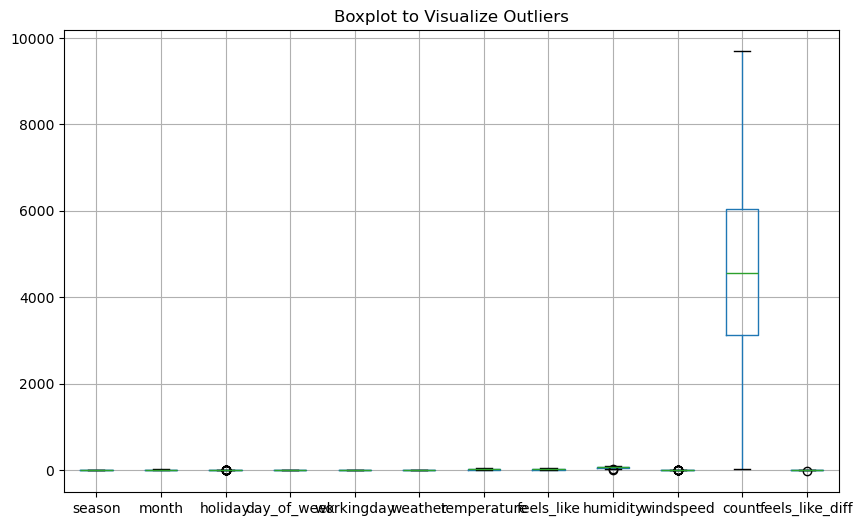

Number of outliers in each column:
season              0
month               0
holiday            21
day_of_week         0
workingday          0
weather             0
temperature         0
feels_like          0
humidity            2
windspeed          13
count               0
feels_like_diff     1
dtype: int64

Shape after removing outliers: (709, 12)

Shape after capping outliers: (745, 12)


In [33]:
# 1. Identify outliers using Interquartile Range (IQR) method
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# 2. Visualize outliers with a boxplot
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Boxplot to Visualize Outliers')
plt.show()

# 3. Handle outliers

# a. Remove outliers
def remove_outliers(data, columns):
    for col in columns:
        outliers = identify_outliers(data[col])
        data = data[~outliers]
    return data

# b. Cap outliers
def cap_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = np.clip(data[col], lower_bound, upper_bound)
    return data

# Example usage
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Identify outliers
outliers = identify_outliers(data[numeric_columns])
print("Number of outliers in each column:")
print(outliers.sum())

# Remove outliers
data_removed_outliers = remove_outliers(data.copy(), numeric_columns)
print("\nShape after removing outliers:", data_removed_outliers.shape)

# Cap outliers
data_capped_outliers = cap_outliers(data.copy(), numeric_columns)
print("\nShape after capping outliers:", data_capped_outliers.shape)

# Note: Choose the method that best suits your data and analysis requirements



## Correlation Analysis <a id='part3'></a>

One key feature in Pandas is the corr() method, which calculates the relationship between each column in our dataset. The result of the corr() method is a table with numbers that represent the correlation between the columns. This number is between -1 and 1, where 1 means a perfect positive correlation, -1 means a perfect negative correlation, and 0 means no correlation.

In the code below, we calculate the correlation matrix and visualize it using a heatmap. We also identify pairs of features that are highly correlated (correlation coefficient greater than 0.8). In this case, we see that petal_length_cm and petal_width_cm are highly correlated (correlation coefficient of 0.93), as well as sepal_length_cm and sepal_width_cm (correlation coefficient of 0.85).

Correlation Matrix:
                   season     month   holiday  day_of_week  workingday  \
season           1.000000  0.826284 -0.009879    -0.002749    0.021696   
month            0.826284  1.000000  0.018101    -0.002096   -0.002211   
holiday         -0.009879  0.018101  1.000000    -0.103289   -0.251531   
day_of_week     -0.002749 -0.002096 -0.103289     1.000000    0.026930   
workingday       0.021696 -0.002211 -0.251531     0.026930    1.000000   
weather          0.010892  0.040262 -0.032871     0.024094    0.060865   
temperature      0.347364  0.221185 -0.029766     0.006498    0.054206   
feels_like       0.351810  0.226060 -0.033629    -0.007997    0.052746   
humidity         0.201656  0.220062 -0.014607    -0.049400    0.029457   
windspeed       -0.225871 -0.210982  0.006252     0.018223   -0.014375   
count            0.361742  0.268143 -0.003882     0.082724    0.049932   
feels_like_diff -0.184304 -0.100594 -0.003073    -0.050366   -0.029953   

                 

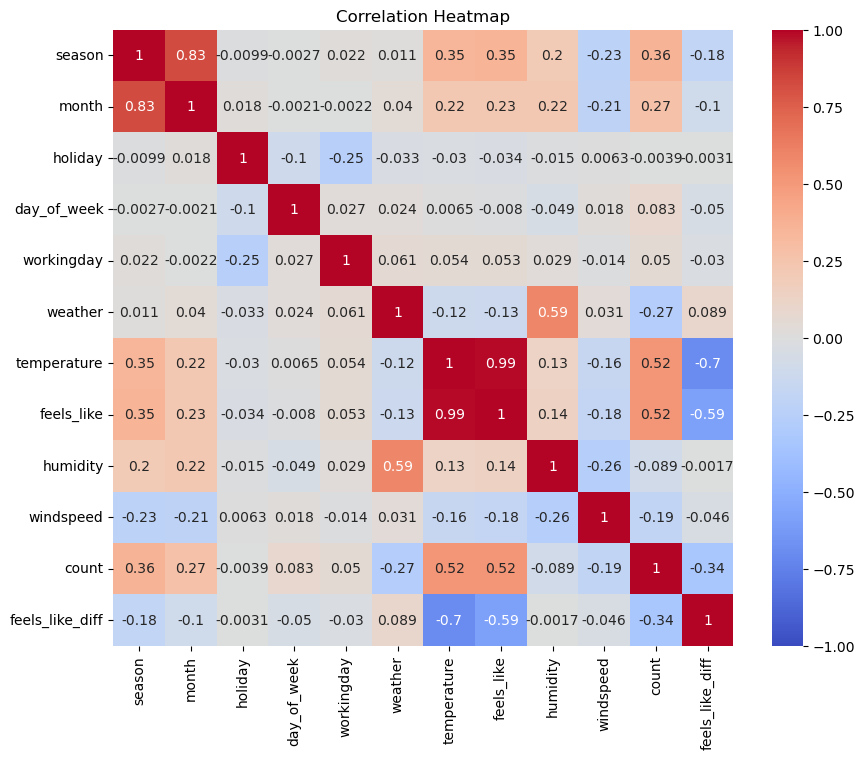


Highly correlated feature pairs:
month & season: 0.83
feels_like & temperature: 0.99


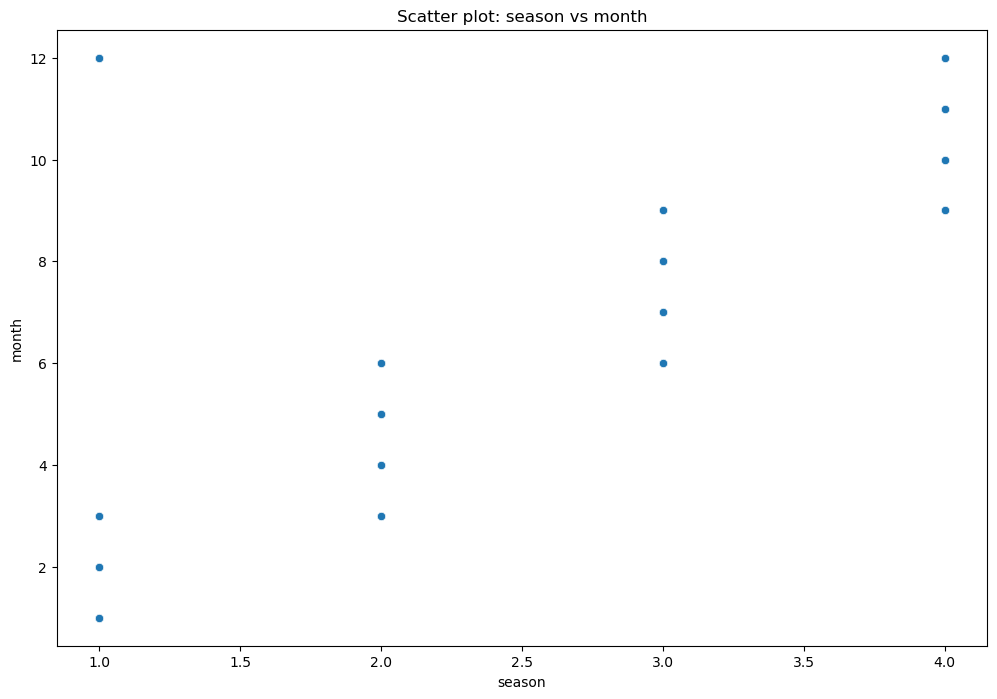

In [35]:
# Perform correlation analysis

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Identify highly correlated features
high_correlation_threshold = 0.8
high_corr = np.abs(correlation_matrix) > high_correlation_threshold

# Print pairs of highly correlated features
print("\nHighly correlated feature pairs:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if high_corr.iloc[i, j]:
            print(f"{correlation_matrix.columns[i]} & {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

# Optional: Scatter plot for highly correlated features
if high_corr.sum().sum() > 0:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=data, x=correlation_matrix.columns[0], y=correlation_matrix.columns[1])
    plt.title(f'Scatter plot: {correlation_matrix.columns[0]} vs {correlation_matrix.columns[1]}')
    plt.show()
